In [1]:
# This notebook:
# 1. Reconstructs profiles from regression results: given primary beam parameters returned by regression reconstructs the photon profiles
# 2. Visualizes how profiles change while PCA features are varied
# 3. Draws profiles from selected files

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
import os
import glob
import random

In [2]:
import config
import utils

In [3]:
means,fieldFeatures,fieldPCAModels = utils.allPCAResults()

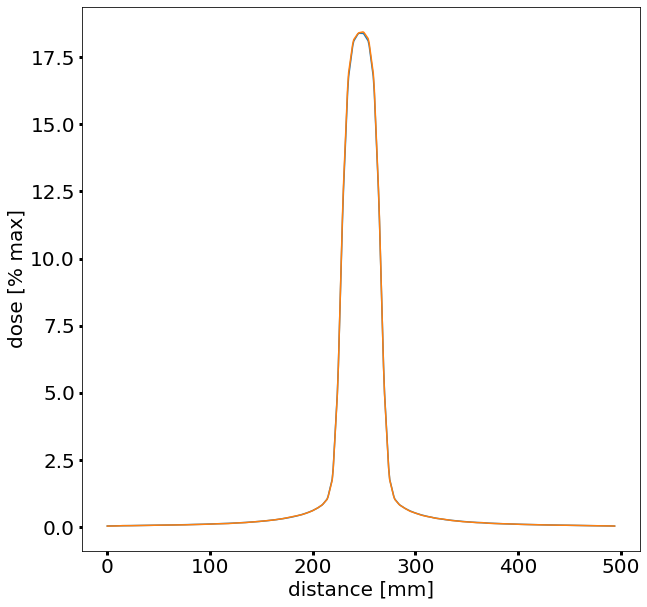

In [4]:
# In the following code PCA fetures are interpolated over the regular 4D grid, given regression results in interpolationPoint
# From the interpolated PCA features profiles in the original space are reconstructed 
# Reconstructed profiles can be then compared against true profiles

from scipy.interpolate import interpn

interpolationPoint = (6.15,0.9,0.35,0.8)    #True parameters of electron beam
interpolationPoint = (6.18,0.5,0.36,0.63)   #Predicted parameters of electron beam

file = np.load('./TestProfiles/a1_fields.npz')
profiles = file[file.files[1]]

FIELD = 0               # 0, 1, or 2 for 3x3, 10x10, or 30x30 fiel
PROFILE = 5             # 0 for depth, 1 to 5 for lateral profiles at different depths, as given by config.profileDepths

values = np.zeros((len(config.simulatedEnergies),len(config.simulatedEnergyDispersions),
                   len(config.simulatedSourceSizes),len(config.simulatedAngularDivergences),3),dtype=np.float)

n = 0
for nE,E in enumerate(config.simulatedEnergies):
    for nse,se in enumerate(config.simulatedEnergyDispersions):
        for ns,s in enumerate(config.simulatedSourceSizes):
            for na,a in enumerate(config.simulatedAngularDivergences):
                np.copyto(values[nE,nse,ns,na,:],fieldFeatures[FIELD][PROFILE][n,:])
                n = n+1


grid = (config.simulatedEnergies, config.simulatedEnergyDispersions, config.simulatedSourceSizes,config.simulatedAngularDivergences)
features = interpn(grid, values, interpolationPoint)
X_Recon = fieldPCAModels[FIELD][PROFILE].inverse_transform(features)[0,:] + means[FIELD][PROFILE]

plt.figure(figsize = (10,10))
plt.tick_params(labelsize=20, width=3)
plt.xlabel('distance [mm]',size=20)
plt.ylabel('dose [% max]',size=20)
plt.plot(X_Recon)
plt.plot(profiles[PROFILE])
plt.show()


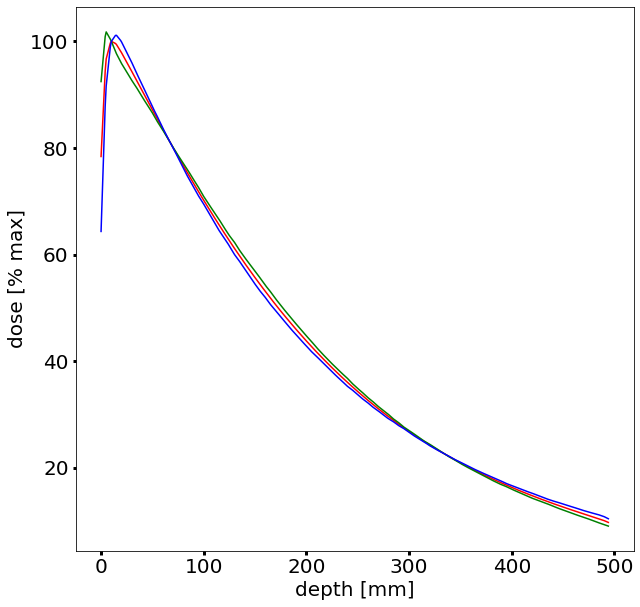

In [6]:
# Visualize PCA modes - run PCA models in the third cell before running this cell

means,fieldFeatures,fieldPCAModels = utils.allPCAResults()

FIELD = 2
PROFILE = 0

AMPLITUDE = 30
POINT = [0,1,0]            # Chose between [1,0,0], [0,1,0], and [0,0,1] to see how the profiles change ahile varying PCA features

modeN = np.asarray([-AMPLITUDE*p for p in POINT])
modeP = np.asarray([AMPLITUDE*p for p in POINT])

X_ReconN = fieldPCAModels[FIELD][PROFILE].inverse_transform(modeN) + means[FIELD][PROFILE]
X_ReconP = fieldPCAModels[FIELD][PROFILE].inverse_transform(modeP) + means[FIELD][PROFILE]

plt.figure(figsize = (10,10))
plt.plot(means[FIELD][PROFILE],'r-',X_ReconN,'g-',X_ReconP,'b-')
plt.tick_params(labelsize=20, width=3)
plt.xlabel('depth [mm]',size=20)
plt.ylabel('dose [% max]',size=20)
plt.show()

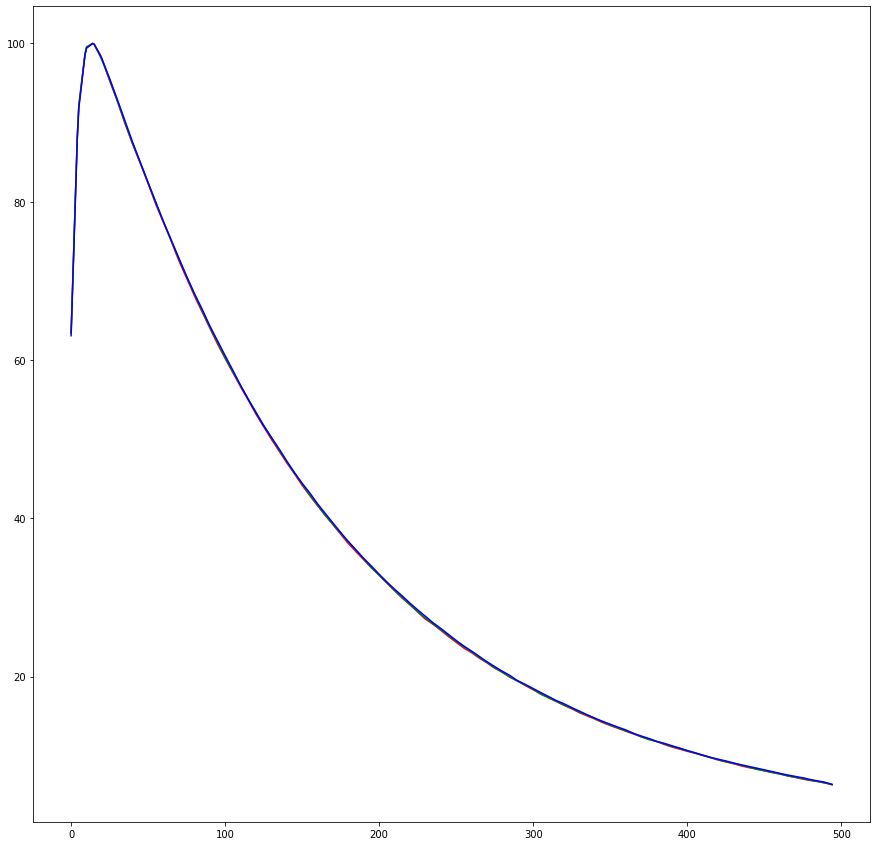

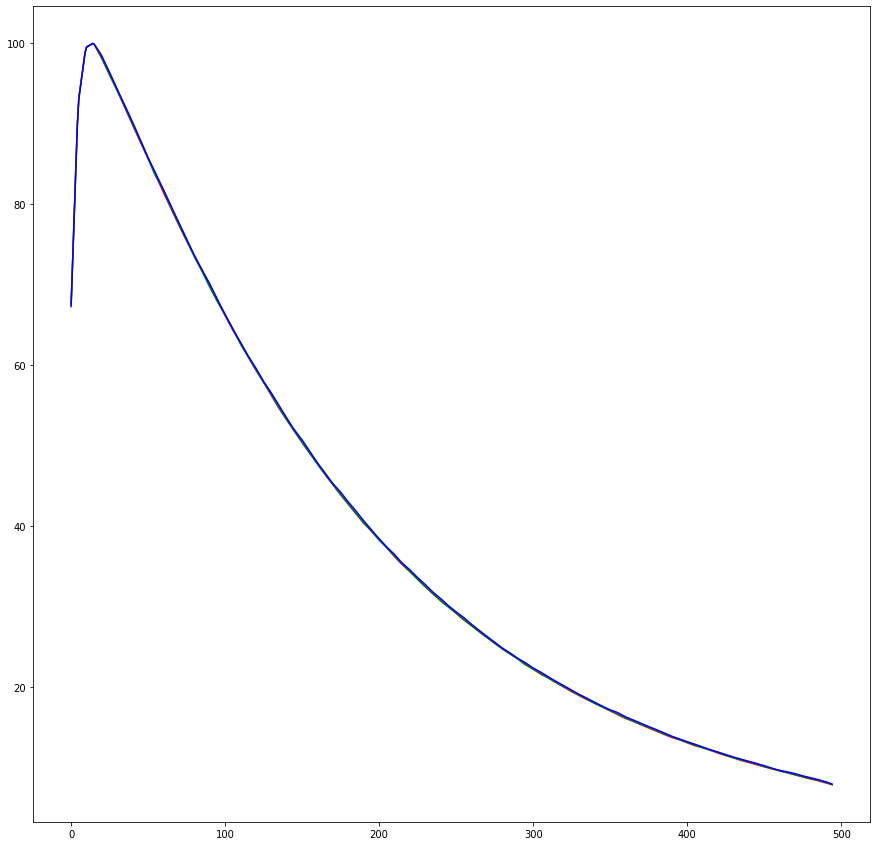

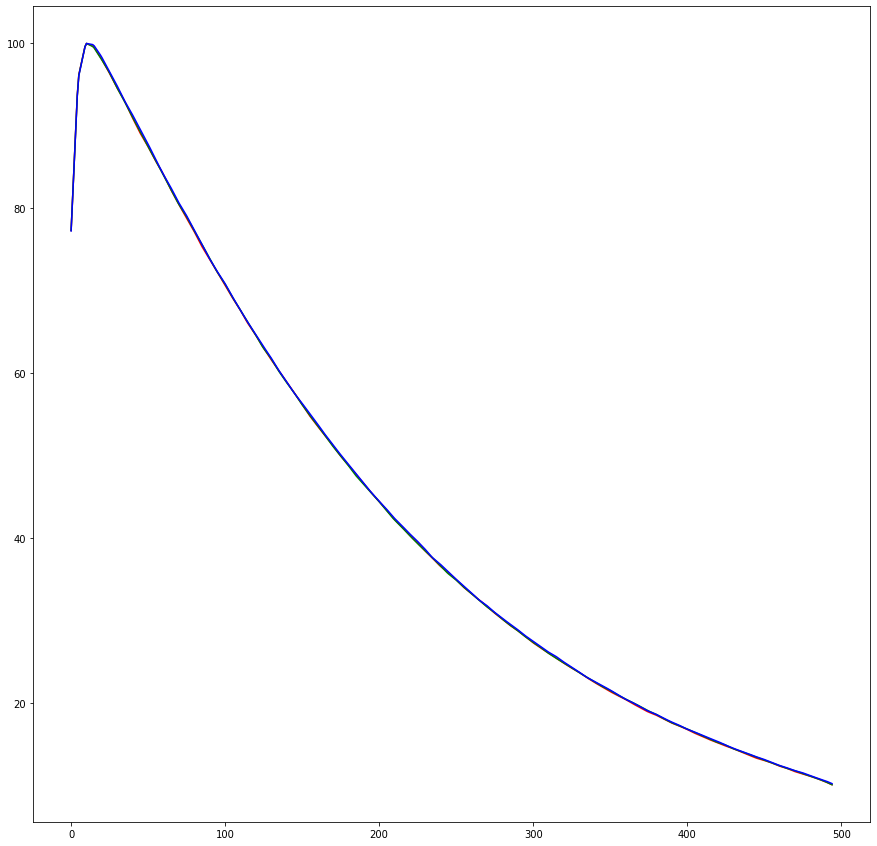

In [58]:
# Draws profiles for selected data points

def createName(t):
    name = str(t[0]) + '_' + str(t[1]) + '_' + str(t[2]) + '_' + str(t[3]) + '_' + str(t[4]) + '.npz'
    return name


color = ['r-','g-','b-']
SLICE = 0
NE = 4
Ns = 3
Na = 3

for E in config.simulatedEnergies[NE:NE+1]:
    for s in config.simulatedSourceSizes[Ns:Ns+1]:
        for a in config.simulatedAngularDivergences[Na:Na+1]:

            plt.figure(figsize=(15, 15))
            for c,se in enumerate(config.simulatedEnergyDispersions):
                name = config.profileDIR + createName((E,se,s,a)+(3,))
                file = np.load(name)
                p = file[file.files[1]][SLICE,:]
                plt.plot(p,color[c])

            name = createName((E,'all',s,a)+(3,)) + '_' + str(SLICE) + '_.png'
            plt.savefig(name)

            plt.figure(figsize=(15, 15))
            for c,se in enumerate(config.simulatedEnergyDispersions):
                name = config.profileDIR + createName((E,se,s,a)+(10,))
                file = np.load(name)
                p = file[file.files[1]][SLICE,:]
                plt.plot(p,color[c])

            name = createName((E,'all',s,a)+(10,)) + '_' + str(SLICE) + '_.png'
            plt.savefig(name)

            plt.figure(figsize=(15, 15))
            for c,se in enumerate(config.simulatedEnergyDispersions):
                name = config.profileDIR + createName((E,se,s,a)+(30,))
                file = np.load(name)
                p = file[file.files[1]][SLICE,:]
                plt.plot(p,color[c])

            name = createName((E,'all',s,a)+(30,)) + '_' + str(SLICE) + '_.png'
            plt.savefig(name)
            